In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1 = pd.read_csv('fold1_train1.csv')
df2 = pd.read_csv('fold1_train2.csv')
df3 = pd.read_csv('fold1_train2.csv')
df  = pd.concat([df1,df2,df3],ignore_index=True)

In [ ]:
df

,ABL,ABLb,CSF1R,CSF1Rb,EGFR,EGFRb,FLT1,FLT1b,FLT4,FLT4b,...,NF2,P53,PI3K,PTEN,RAS,Bliss,ZIP,DRUG1,DRUG2,CELL_LINE
0,0.000517,0.000578,0.103,0.3330,0.971,0.164,0.1620,0.00476,0.91200,0.00741,...,0,1,0,1,0,4.11,3.20,1-(5-DEOXYPENTOFURANOSYL)-5-FLUORO-4-{[(PENTYL...,CHEMBL277800,BT549
1,0.000517,0.026300,0.103,0.8220,0.971,0.620,0.1620,0.99900,0.91200,0.26100,...,0,1,0,1,0,2.23,-1.15,1-(5-DEOXYPENTOFURANOSYL)-5-FLUORO-4-{[(PENTYL...,QUINACRINE HYDROCHLORIDE,BT549
2,0.000492,0.023100,0.221,0.0957,0.495,0.996,0.0916,0.02450,0.00964,0.01800,...,0,1,0,1,0,1.19,-0.07,34793-34-5,CARMUSTINE,BT549
3,0.000492,0.989000,0.221,0.4440,0.495,0.245,0.0916,1.00000,0.00964,0.99700,...,0,1,0,1,0,1.18,-1.94,34793-34-5,SORAFENIB,BT549
4,0.000492,0.045200,0.221,0.8940,0.495,0.991,0.0916,0.83200,0.00964,0.60000,...,0,1,0,1,0,0.78,1.99,34793-34-5,IXABEPILONE,BT549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64365,0.998000,0.411000,0.206,0.9950,1.000,0.736,0.9990,0.01830,0.94000,0.67700,...,0,1,2,0,0,0.11,0.94,ADM HYDROCHLORIDE,METHOTREXATE,T47D
64366,0.998000,0.994000,0.206,0.9760,1.000,0.999,0.9990,0.82700,0.94000,0.74400,...,0,1,2,0,0,-3.57,-2.36,ADM HYDROCHLORIDE,VINBLASTINE SULFATE,T47D
64367,0.998000,0.108000,0.206,0.9130,1.000,0.305,0.9990,0.70800,0.94000,0.02190,...,0,1,2,0,0,1.66,2.48,ADM HYDROCHLORIDE,IMIQUIMOD,T47D
64368,0.192000,0.012300,0.889,0.8680,0.999,0.990,0.9630,0.99600,0.95800,0.02340,...,0,1,2,0,0,-1.12,-5.17,NSC256439,DOCETAXEL,T47D


In [ ]:
df.describe()

,ABL,ABLb,CSF1R,CSF1Rb,EGFR,EGFRb,FLT1,FLT1b,FLT4,FLT4b,...,TUB1b,GATA3,NF1,NF2,P53,PI3K,PTEN,RAS,Bliss,ZIP
count,64370.000000,64370.000000,64370.000000,64370.000000,64370.000000,64370.000000,64370.000000,64370.000000,64370.000000,64370.000000,...,64370.000000,64370.000000,64370.000000,64370.000000,64370.000000,64370.000000,64370.000000,64370.000000,64370.000000,64370.000000
mean,0.354116,0.354116,0.526900,0.526900,0.704822,0.704822,0.522116,0.522116,0.342146,0.342146,...,0.940550,0.201398,0.201056,0.201056,0.798602,0.802299,0.199006,0.402113,0.196524,-1.651984
std,0.409292,0.409292,0.358662,0.358662,0.379978,0.379978,0.428891,0.428891,0.379880,0.379880,...,0.128726,0.401048,0.400793,0.400793,0.401048,0.980270,0.399255,0.801586,5.643395,5.276723
min,0.000008,0.000008,0.002520,0.002520,0.000238,0.000238,0.000003,0.000003,0.000118,0.000118,...,0.388000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.390000,-20.120000
25%,0.003270,0.003270,0.160000,0.160000,0.305000,0.305000,0.060700,0.060700,0.012300,0.012300,...,0.968000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.660000,-4.940000
50%,0.103000,0.103000,0.510000,0.510000,0.964000,0.964000,0.610000,0.610000,0.144000,0.144000,...,0.991000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.140000,-1.660000
75%,0.817000,0.817000,0.897000,0.897000,0.999000,0.999000,0.994000,0.994000,0.708000,0.708000,...,0.999000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,3.060000,1.160000
max,1.000000,1.000000,0.998000,0.998000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,44.720000,41.470000


In [ ]:
#removing duplicate rows
df = df.drop_duplicates()

In [ ]:
df

,ABL,ABLb,CSF1R,CSF1Rb,EGFR,EGFRb,FLT1,FLT1b,FLT4,FLT4b,...,NF2,P53,PI3K,PTEN,RAS,Bliss,ZIP,DRUG1,DRUG2,CELL_LINE
0,0.000517,0.000578,0.103,0.3330,0.971,0.1640,0.1620,0.00476,0.91200,0.007410,...,0,1,0,1,0,4.11,3.20,1-(5-DEOXYPENTOFURANOSYL)-5-FLUORO-4-{[(PENTYL...,CHEMBL277800,BT549
1,0.000517,0.026300,0.103,0.8220,0.971,0.6200,0.1620,0.99900,0.91200,0.261000,...,0,1,0,1,0,2.23,-1.15,1-(5-DEOXYPENTOFURANOSYL)-5-FLUORO-4-{[(PENTYL...,QUINACRINE HYDROCHLORIDE,BT549
2,0.000492,0.023100,0.221,0.0957,0.495,0.9960,0.0916,0.02450,0.00964,0.018000,...,0,1,0,1,0,1.19,-0.07,34793-34-5,CARMUSTINE,BT549
3,0.000492,0.989000,0.221,0.4440,0.495,0.2450,0.0916,1.00000,0.00964,0.997000,...,0,1,0,1,0,1.18,-1.94,34793-34-5,SORAFENIB,BT549
4,0.000492,0.045200,0.221,0.8940,0.495,0.9910,0.0916,0.83200,0.00964,0.600000,...,0,1,0,1,0,0.78,1.99,34793-34-5,IXABEPILONE,BT549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37545,0.998000,0.000039,0.206,0.7890,1.000,0.1220,0.9990,0.17400,0.94000,0.000767,...,0,1,2,0,0,-2.56,-0.30,ADM HYDROCHLORIDE,CO-V,T47D
37546,0.998000,0.136000,0.206,0.9390,1.000,0.0154,0.9990,0.00336,0.94000,0.086400,...,0,1,2,0,0,3.60,1.02,ADM HYDROCHLORIDE,ALLOPURINOL,T47D
37547,0.998000,0.944000,0.206,0.0695,1.000,1.0000,0.9990,1.00000,0.94000,0.952000,...,0,1,2,0,0,-4.75,-4.48,ADM HYDROCHLORIDE,MECHLORETHAMINE HYDROCHLORIDE,T47D
37548,0.998000,0.014400,0.206,0.9930,1.000,0.9640,0.9990,0.06260,0.94000,0.029900,...,0,1,2,0,0,2.33,2.39,ADM HYDROCHLORIDE,DACARBAZINE,T47D


In [ ]:
#checking the name of the columns
df.columns

Index(['ABL', 'ABLb', 'CSF1R', 'CSF1Rb', 'EGFR', 'EGFRb', 'FLT1', 'FLT1b',
       'FLT4', 'FLT4b', 'KDR', 'KDRb', 'KIT', 'KITb', 'MCL1', 'MCL1b', 'NR1I2',
       'NR1I2b', 'PDGFRB', 'PDGFRBb', 'RET', 'RETb', 'TOP2', 'TOP2b', 'TUB1',
       'TUB1b', 'GATA3', 'NF1', 'NF2', 'P53', 'PI3K', 'PTEN', 'RAS', 'Bliss',
       'ZIP', 'DRUG1', 'DRUG2', 'CELL_LINE'],
      dtype='object')

In [ ]:
print(df.isnull().sum())


ABL          0
ABLb         0
CSF1R        0
CSF1Rb       0
EGFR         0
EGFRb        0
FLT1         0
FLT1b        0
FLT4         0
FLT4b        0
KDR          0
KDRb         0
KIT          0
KITb         0
MCL1         0
MCL1b        0
NR1I2        0
NR1I2b       0
PDGFRB       0
PDGFRBb      0
RET          0
RETb         0
TOP2         0
TOP2b        0
TUB1         0
TUB1b        0
GATA3        0
NF1          0
NF2          0
P53          0
PI3K         0
PTEN         0
RAS          0
Bliss        0
ZIP          0
DRUG1        0
DRUG2        0
CELL_LINE    0
dtype: int64


In [ ]:
cell = set(df['CELL_LINE'])
cell

{'BT549', 'MCF7', 'MDA-MB-231', 'MDA-MB-468', 'T47D'}

In [ ]:
cell_counts = df['CELL_LINE'].value_counts()

In [ ]:
cell_counts

,count
CELL_LINE,
MCF7,6481
MDA-MB-231,6470
T47D,6428
BT549,6404
MDA-MB-468,6398


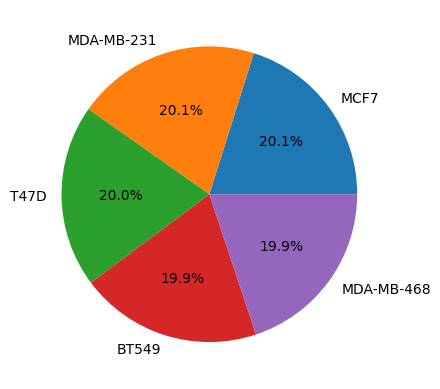

In [ ]:
plt.pie(cell_counts,labels=cell_counts.index,autopct='%1.1f%%')
plt.show()

In [ ]:
drug1 = set(df['DRUG1'])
drug1

{'1-(5-DEOXYPENTOFURANOSYL)-5-FLUORO-4-{[(PENTYLOXY)CARBONYL]AMINO}PYRIMIDIN-2(1H)-ONE',
 '34793-34-5',
 '5-FU',
 'ABIRATERONE',
 'ACTINOMYCIN D',
 'ADM HYDROCHLORIDE',
 'ALLOPURINOL',
 'ALTRETAMINE',
 'AMIFOSTINE',
 'AMINOLEVULINIC ACID HYDROCHLORIDE',
 'ANASTROZOLE',
 'ANTIBIOTIC AD 32',
 'ANTIBIOTIC AY 22989',
 'ARSENIC TRIOXIDE',
 'AXITINIB',
 'AZACYTIDINE',
 'BENDAMUSTINE HYDROCHLORIDE',
 'BLEOMYCIN',
 'BORTEZOMIB',
 'BUSULFAN',
 'CABAZITAXEL',
 'CARBOPLATIN',
 'CARMUSTINE',
 'CELECOXIB',
 'CHEMBL17639',
 'CHEMBL277800',
 'CHLORAMBUCIL',
 'CISPLATINO',
 'CO-V',
 'CRIZOTINIB',
 'CYCLOPHOSPHAMIDE',
 'CYTARABINE HYDROCHLORIDE',
 'DACARBAZINE',
 'DASATINIB',
 'DAUNORUBICIN HYDROCHLORIDE',
 'DEXRAZOXANE',
 'DOCETAXEL',
 'EMCYT (PHARMACIA)',
 'ERLOTINIB HYDROCHLORIDE',
 'EXEMESTANE',
 'FLUDARABINE BASE',
 'FULVESTRANT',
 'GEFITINIB',
 'HYDROXYUREA',
 'IFOSFAMIDE',
 'IMATINIB',
 'IMIQUIMOD',
 'IXABEPILONE',
 'LAPATINIB',
 'LENALIDOMIDE',
 'LETROZOLE',
 'LOMUSTINE',
 'MECHLORETHAMINE HYDR

In [ ]:
drug2 = set(df['DRUG2'])
drug2

{'1-(5-DEOXYPENTOFURANOSYL)-5-FLUORO-4-{[(PENTYLOXY)CARBONYL]AMINO}PYRIMIDIN-2(1H)-ONE',
 '34793-34-5',
 '5-FU',
 'ABIRATERONE',
 'ACTINOMYCIN D',
 'ADM HYDROCHLORIDE',
 'ALLOPURINOL',
 'ALTRETAMINE',
 'AMIFOSTINE',
 'AMINOLEVULINIC ACID HYDROCHLORIDE',
 'ANASTROZOLE',
 'ANTIBIOTIC AD 32',
 'ANTIBIOTIC AY 22989',
 'ARSENIC TRIOXIDE',
 'AXITINIB',
 'AZACYTIDINE',
 'BENDAMUSTINE HYDROCHLORIDE',
 'BLEOMYCIN',
 'BORTEZOMIB',
 'BUSULFAN',
 'CABAZITAXEL',
 'CARBOPLATIN',
 'CARMUSTINE',
 'CELECOXIB',
 'CHEMBL17639',
 'CHEMBL277800',
 'CHLORAMBUCIL',
 'CISPLATINO',
 'CO-V',
 'CRIZOTINIB',
 'CYCLOPHOSPHAMIDE',
 'CYTARABINE HYDROCHLORIDE',
 'DACARBAZINE',
 'DASATINIB',
 'DAUNORUBICIN HYDROCHLORIDE',
 'DEXRAZOXANE',
 'DOCETAXEL',
 'EMCYT (PHARMACIA)',
 'ERLOTINIB HYDROCHLORIDE',
 'EXEMESTANE',
 'FLUDARABINE BASE',
 'FULVESTRANT',
 'GEFITINIB',
 'HYDROXYUREA',
 'IFOSFAMIDE',
 'IMATINIB',
 'IMIQUIMOD',
 'IXABEPILONE',
 'LAPATINIB',
 'LENALIDOMIDE',
 'LETROZOLE',
 'LOMUSTINE',
 'MECHLORETHAMINE HYDR

In [ ]:
drug = drug1.intersection(drug2)
drug

In [ ]:
drug1_counts = df['DRUG1'].value_counts()
drug2_counts = df['DRUG2'].value_counts()


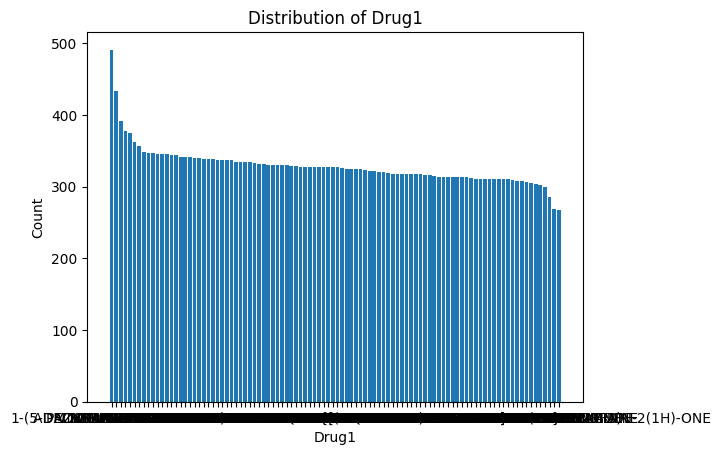

In [ ]:
plt.bar(drug1_counts.index, drug1_counts.values)
plt.xlabel('Drug1')
plt.ylabel('Count')
plt.title('Distribution of Drug1')
plt.show()

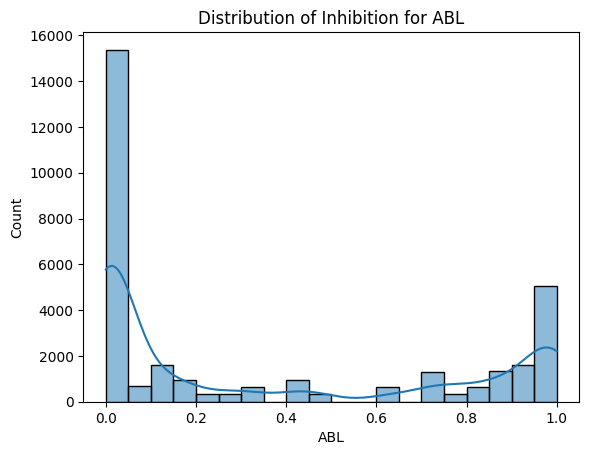

In [ ]:

sb.histplot(df['ABL'], kde=True)
plt.title('Distribution of Inhibition for ABL')
plt.show()


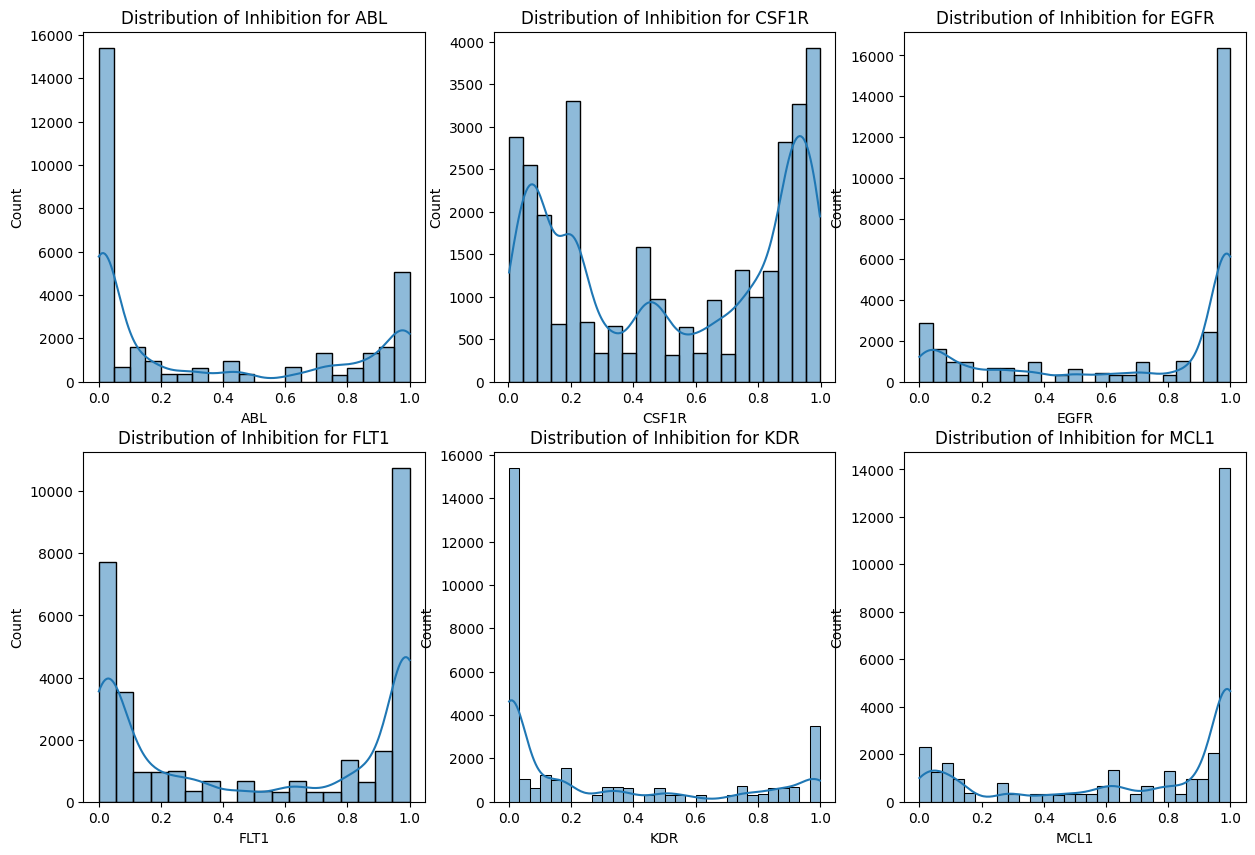

In [ ]:
protein_columns = ['ABL', 'CSF1R', 'EGFR', 'FLT1', 'KDR','MCL1']

rows = 2
cols = 3


fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))
axes = axes.flatten()

for i, protein in enumerate(protein_columns):
    sb.histplot(df[protein], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Inhibition for {protein}')

plt.show()


In [ ]:
#trying PCA
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['DRUG1', 'DRUG2', 'CELL_LINE'], dtype='object')


In [ ]:
label_encoder = LabelEncoder()
df['DRUG1'] = label_encoder.fit_transform(df['DRUG1'])
df['DRUG2'] = label_encoder.fit_transform(df['DRUG2'])
df['CELL_LINE'] = label_encoder.fit_transform(df['CELL_LINE'])

<ipython-input-124-596c53a91bdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRUG1'] = label_encoder.fit_transform(df['DRUG1'])
<ipython-input-124-596c53a91bdc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRUG2'] = label_encoder.fit_transform(df['DRUG2'])
<ipython-input-124-596c53a91bdc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
df_numeric = df.select_dtypes(include=[float, int])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [ ]:
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components[:, :5], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

#principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

principal_df['CELL_LINE'] = df['CELL_LINE']

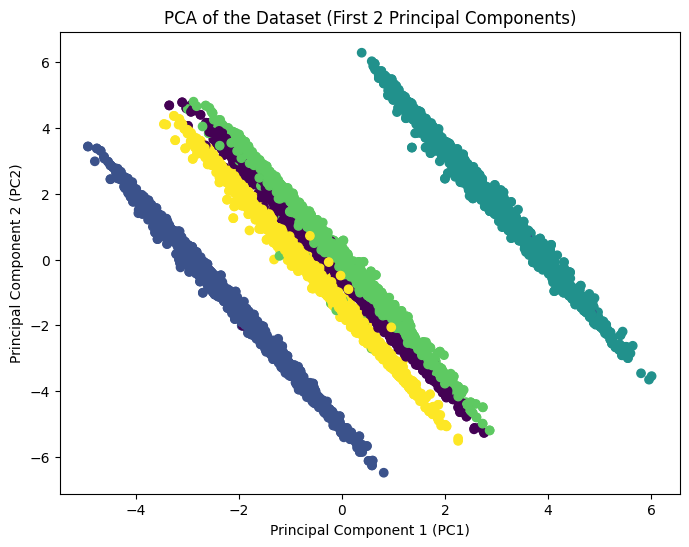

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'],c=principal_df['CELL_LINE'])
plt.title('PCA of the Dataset (First 2 Principal Components)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.09786619, 0.09667335, 0.09653296, 0.05890446, 0.04935232])

In [ ]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(cumulative_variance)


[0.09786619 0.19453955 0.2910725  0.34997697 0.39932928]
